In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cs = pd.read_csv('resume_list_cs.csv')

In [3]:
df_cs.head()

,job_title,resume
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...


In [4]:
df_cs["Category"] = "Customer Support"
df_cs.to_csv("resume_list_cs.csv", index=False)

In [5]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  100 non-null    object
 1   resume     100 non-null    object
 2   Category   100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [6]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df_cs['job_title'].unique())

Displaying the distinct categories of resume:

 
['Support Representative Customer Service'
 'Desktop Support Customer Service' 'Warehouse Manager Customer Support'
 'Customer Service Support' 'Customer Support Analyst'
 'Customer Service Support Representative' 'Customer Support Blanco'
 'Support Agent Customer Service' 'Customer Support Call Center'
 'Customer Service Support Specialist'
 'Software Developer Customer Support'
 'Support Agent Sales Associate, customer service'
 'Inventory Specialist Customer Support'
 'Customer Service Desktop Support'
 'Clerical Support, Customer Service, able to work with RF Guns, devices'
 'Customer Service Support Technician' 'Operator Customer Support'
 'Support Agent Customer' 'Sales Associate Customer Support'
 'Customer Service Direct Support'
 'Customer Service / Technical Support Specialist' 'Customer Support Ios'
 'Professional Speaker, Customer Support Specialist, Videography'
 'Community service, customer service and support.'
 'Customer 

In [7]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df_cs['job_title'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Desktop Support Customer Service           11
Customer Service Support                   11
Support Representative Customer Service     6
Support Agent Customer Service              4
Customer Service Technical Support          3
                                           ..
Customer Support Sun                        1
Direct Support Customer Service             1
Customer support/ technical assistance      1
Customer service/ technical support         1
Customer Support Associate                  1
Name: job_title, Length: 62, dtype: int64


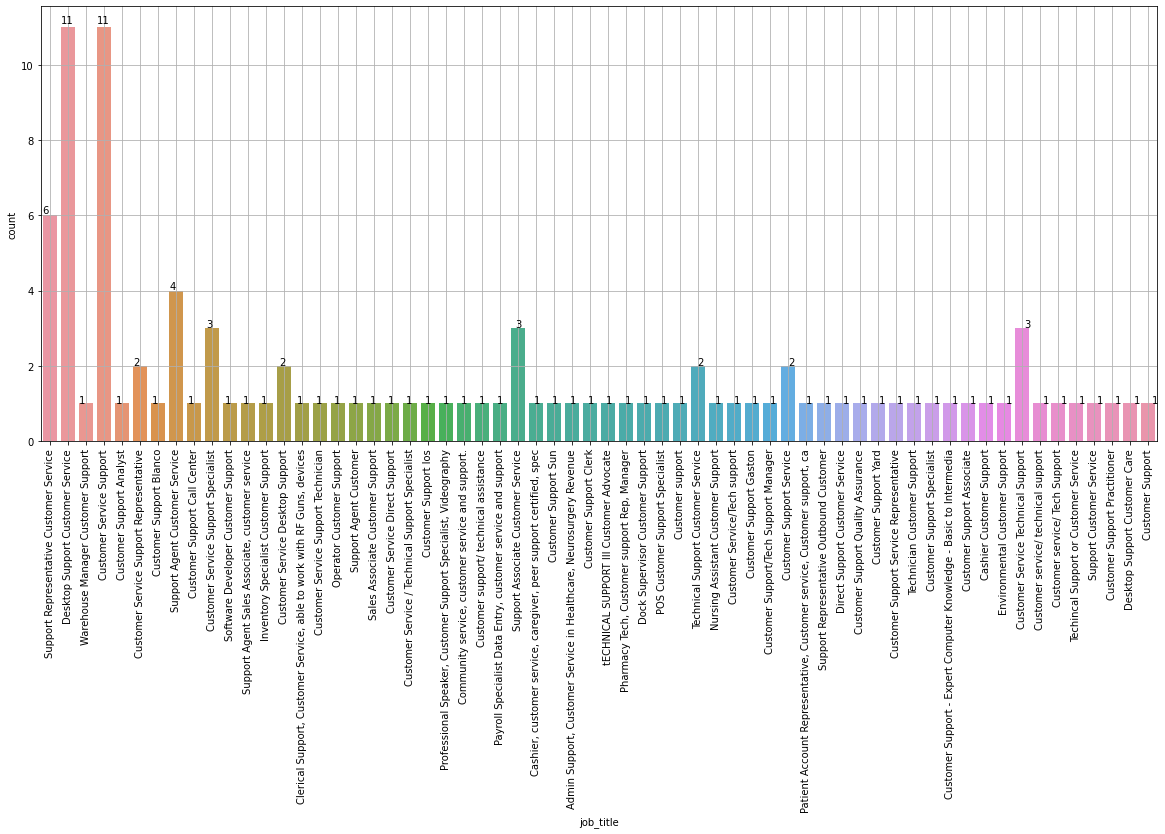

In [8]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.countplot(x="job_title", data=df_cs)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df_cs['cleaned_resume'] = df_cs.resume.apply(lambda x: cleanResume(x))

In [10]:
df_cs.head()

,job_title,resume,Category,cleaned_resume
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...


## Tokenization

In [11]:
import nltk
import string
from nltk.tokenize import word_tokenize

In [12]:
df_cs['tokenized'] = df_cs['cleaned_resume'].apply(word_tokenize)
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,..."


## Converting to lower case

In [13]:
df_cs['lowercase'] = df_cs['tokenized'].apply(lambda x: [word.lower() for word in x])
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,..."


In [14]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

## Removing stop words

In [15]:
stop_words = set(stopwords.words('english'))
df_cs['stopwords_removed'] = df_cs['lowercase'].apply(lambda x: [word for word in x if word not in stop_words])
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,..."


## POS

In [16]:
df_cs['pos_tags'] = df_cs['stopwords_removed'].apply(nltk.tag.pos_tag)
df_cs.head()


,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),..."


In [17]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_cs['wordnet_pos'] = df_cs['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca...","[(ebony, n), (nettles, n), (snow, v), (camp, a..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ...","[(rachel, n), (rader, n), (elizabeth, v), (cit..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB...","[(makiya, n), (williams, n), (hollywood, v), (..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ...","[(juan, a), (carrasco, n), (el, n), (paso, n),..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),...","[(kendra, v), (brown, a), (greenville, n), (sc..."


In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
wnl = WordNetLemmatizer()
df_cs['lemmatized'] = df_cs['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca...","[(ebony, n), (nettles, n), (snow, v), (camp, a...","[ebony, nettle, snow, camp, nc, 1, 336, adp8ok..."
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ...","[(rachel, n), (rader, n), (elizabeth, v), (cit...","[rachel, rader, elizabeth, city, nc, adp798, 1..."
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB...","[(makiya, n), (williams, n), (hollywood, v), (...","[makiya, williams, hollywood, fl, adp7rz, 1, 9..."
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ...","[(juan, a), (carrasco, n), (el, n), (paso, n),...","[juan, carrasco, el, paso, tx, 6, 915, profile..."
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),...","[(kendra, v), (brown, a), (greenville, n), (sc...","[kendra, brown, greenville, sc, 29615, adp5s0,..."


In [20]:
import docx2txt

In [21]:
job_desc = docx2txt.process("job_descp_cs.docx")
print(job_desc)

The Customer Support attracts potential customers by answering product and service questions; suggesting information about other products and services. Process orders, prepare correspondences and fulfill customer inquiries to ensure customer satisfaction.

Requires a high school diploma or equivalent and 0-3 years of experience in the field or in a related area. Has knowledge of commonly-used concepts, practices, and procedures within a particular field. Rely on instructions and pre-established guidelines to perform the functions of the job. Works under immediate supervision. Primary job functions do not typically require exercising independent judgment. Typically reports to a supervisor or manager. The target is to ensure excellent service standards and maintain high customer satisfaction.


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
def fit_check(text_df):
    text = [text_df,job_desc]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+20
    return match

df_cs['Right_fit_Score'] = df_cs.cleaned_resume.apply(lambda x: fit_check(x))

    
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca...","[(ebony, n), (nettles, n), (snow, v), (camp, a...","[ebony, nettle, snow, camp, nc, 1, 336, adp8ok...",82.31
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ...","[(rachel, n), (rader, n), (elizabeth, v), (cit...","[rachel, rader, elizabeth, city, nc, adp798, 1...",71.36
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB...","[(makiya, n), (williams, n), (hollywood, v), (...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...",66.40
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ...","[(juan, a), (carrasco, n), (el, n), (paso, n),...","[juan, carrasco, el, paso, tx, 6, 915, profile...",77.37
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),...","[(kendra, v), (brown, a), (greenville, n), (sc...","[kendra, brown, greenville, sc, 29615, adp5s0,...",78.40


In [28]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [29]:
df_cs.head(100)

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca...","[(ebony, n), (nettles, n), (snow, v), (camp, a...","[ebony, nettle, snow, camp, nc, 1, 336, adp8ok...",82.31
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ...","[(rachel, n), (rader, n), (elizabeth, v), (cit...","[rachel, rader, elizabeth, city, nc, adp798, 1...",71.36
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB...","[(makiya, n), (williams, n), (hollywood, v), (...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...",66.40
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ...","[(juan, a), (carrasco, n), (el, n), (paso, n),...","[juan, carrasco, el, paso, tx, 6, 915, profile...",77.37
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),...","[(kendra, v), (brown, a), (greenville, n), (sc...","[kendra, brown, greenville, sc, 29615, adp5s0,...",78.40
5,Customer Support Analyst,\r\n*\r\nPublic\r\nSumaya Abdullathif\r\nadp5f...,Customer Support,Public Sumaya Abdullathif adp5fn Phone 1 858 ...,"[Public, Sumaya, Abdullathif, adp5fn, Phone, 1...","[public, sumaya, abdullathif, adp5fn, phone, 1...","[public, sumaya, abdullathif, adp5fn, phone, 1...","[(public, JJ), (sumaya, NN), (abdullathif, NN)...","[(public, a), (sumaya, n), (abdullathif, n), (...","[public, sumaya, abdullathif, adp5fn, phone, 1...",70.25
6,Customer Service Support Representative,\r\nLaTonya Singleton\r\n**** **** *****\r\nLi...,Customer Support,LaTonya Singleton Little Rock Arkansas 72206 ...,"[LaTonya, Singleton, Little, Rock, Arkansas, 7...","[latonya, singleton, little, rock, arkansas, 7...","[latonya, singleton, little, rock, arkansas, 7...","[(latonya, JJ), (singleton, NN), (little, JJ),...","[(latonya, a), (singleton, n), (little, a), (r...","[latonya, singleton, little, rock, arkansas, 7...",66.34
7,Customer Support Blanco,\r\nYulenny Blanco 347-***-****\r\nadp43f@r.po...,Customer Support,Yulenny Blanco 347 adp43f EXPERIENCE I have n...,"[Yulenny, Blanco, 347, adp43f, EXPERIENCE, I, ...","[yulenny, blanco, 347, adp43f, experience, i, ...","[yulenny, blanco, 347, adp43f, experience, exp...","[(yulenny, RB), (blanco, $), (347, CD), (adp43...","[(yulenny, r), (blanco, n), (347, n), (adp43f,...","[yulenny, blanco, 347, adp43f, experience, exp...",44.96
8,Support Agent Customer Service,\r\nSabrina Lea Johnson\r\n*** ******** ***\r\...,Customer Support,Sabrina Lea Johnson Mou

In [30]:
df_cs['Right_fit_Score'].max()

85.85

In [31]:
skill = docx2txt.process("skill_ds.docx")
print(skill)

Fundamentals of Data Science, Statistics, Programming knowledge, Data Manipulation and Analysis, Data Visualization, Machine Learning, Deep Learning, Big Data, Software Engineering, Model Deployment, Communication Skills, Storytelling Skills, Structured Thinking, Curiosity


In [36]:
def skill_check(text_df):
    text = [text_df,skill]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    match = cosine_similarity(count_matrix)[0][1]
    match = match*100
    match = round(match,2)
    match = match+50
    return match

df_cs['skill_fit_Score'] = df_cs.cleaned_resume.apply(lambda x: skill_check(x))

    
df_cs.head()

,job_title,resume,Category,cleaned_resume,tokenized,lowercase,stopwords_removed,pos_tags,wordnet_pos,lemmatized,Right_fit_Score,skill_fit_Score
0,Support Representative Customer Service,"\r\nEBONY NETTLES\r\nSnow Camp, NC ***** 1-336...",Customer Support,EBONY NETTLES Snow Camp NC 1 336 adp8ok Profe...,"[EBONY, NETTLES, Snow, Camp, NC, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[ebony, nettles, snow, camp, nc, 1, 336, adp8o...","[(ebony, NN), (nettles, NNS), (snow, VBP), (ca...","[(ebony, n), (nettles, n), (snow, v), (camp, a...","[ebony, nettle, snow, camp, nc, 1, 336, adp8ok...",82.31,64.15
1,Desktop Support Customer Service,"\r\nRachel Rader\r\nElizabeth City, NC *****\r...",Customer Support,Rachel Rader Elizabeth City NC adp798 1 717 A...,"[Rachel, Rader, Elizabeth, City, NC, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[rachel, rader, elizabeth, city, nc, adp798, 1...","[(rachel, NN), (rader, NN), (elizabeth, VBZ), ...","[(rachel, n), (rader, n), (elizabeth, v), (cit...","[rachel, rader, elizabeth, city, nc, adp798, 1...",71.36,58.63
2,Desktop Support Customer Service,"\r\nMakiya Williams\r\nHollywood, FL *****\r\n...",Customer Support,Makiya Williams Hollywood FL adp7rz 1 954 I a...,"[Makiya, Williams, Hollywood, FL, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...","[(makiya, NN), (williams, NNS), (hollywood, VB...","[(makiya, n), (williams, n), (hollywood, v), (...","[makiya, williams, hollywood, fl, adp7rz, 1, 9...",66.40,58.46
3,Warehouse Manager Customer Support,\r\nJuan Carrasco\r\n***** ***** *****\r\nEl P...,Customer Support,Juan Carrasco El Paso TX 6 915 Profile As an ...,"[Juan, Carrasco, El, Paso, TX, 6, 915, Profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[juan, carrasco, el, paso, tx, 6, 915, profile...","[(juan, JJ), (carrasco, NN), (el, NN), (paso, ...","[(juan, a), (carrasco, n), (el, n), (paso, n),...","[juan, carrasco, el, paso, tx, 6, 915, profile...",77.37,64.39
4,Customer Service Support,\r\nKendra Brown\r\n** ******** **. *** * - **...,Customer Support,Kendra Brown Greenville SC 29615 adp5s0 704 E...,"[Kendra, Brown, Greenville, SC, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[kendra, brown, greenville, sc, 29615, adp5s0,...","[(kendra, VB), (brown, JJ), (greenville, NNS),...","[(kendra, v), (brown, a), (greenville, n), (sc...","[kendra, brown, greenville, sc, 29615, adp5s0,...",78.40,66.30


In [37]:
df_cs['skill_fit_Score'].max()

70.57